In [61]:
import matplotlib.pyplot as plt
# import matplotlib as mpl

from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 때문에 한글이 깨질 수가 있어서 주는 설정
rc('font', family='Malgun Gothic')
%matplotlib inline

In [62]:
import pandas as pd

In [63]:
cctv_seoul = pd.read_csv('../data/01. Seoul_CCTV.csv',)
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace=True)
cctv_seoul['최근증가율'] = (
    (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100
)

In [64]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [65]:
pop_seoul = pd.read_excel('../data/01. Seoul_Population.xls', header=2, usecols=['자치구', '계', '계.1', '계.2', '65세이상고령자'])
pop_seoul.rename(columns={
    pop_seoul.columns[0] : '구별',
    pop_seoul.columns[1] : '인구수',
    pop_seoul.columns[2] : '한국인',
    pop_seoul.columns[3] : '외국인',
    pop_seoul.columns[4] : '고령자',
    }, inplace=True)

In [66]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [67]:
pop_seoul.drop([0], axis=0, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [68]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


# merge

In [69]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 연도별 데이터 컬럼 삭제
- del
- drop()

In [70]:
del data_result['2013년도 이전']

In [71]:
del data_result['2014년']

In [72]:
data_result.drop(['2015년', '2016년'], axis=1, inplace=True)

In [73]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### index 변경
- `set_index()`
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [74]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- `corr()`
- correlation의 약자
- 상관계수가 0.2 이상인 데이터를 비교

In [75]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [76]:
data_result.info()      # object 타입이 있으면 CORR() 연산이 되지 않음

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [77]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수']
data_result['CCTV비율'] = data_result['CCTV비율'] * 100

In [78]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [79]:
# CCTV 비중이 높은 구별 데이터
data_result.sort_values(by='CCTV비율', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [80]:
# CCTV 비중이 낮은 구별 데이터
data_result.sort_values(by='CCTV비율', ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---
# 데이터 사전 정리 끝

In [81]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

<AxesSubplot:ylabel='구별'>

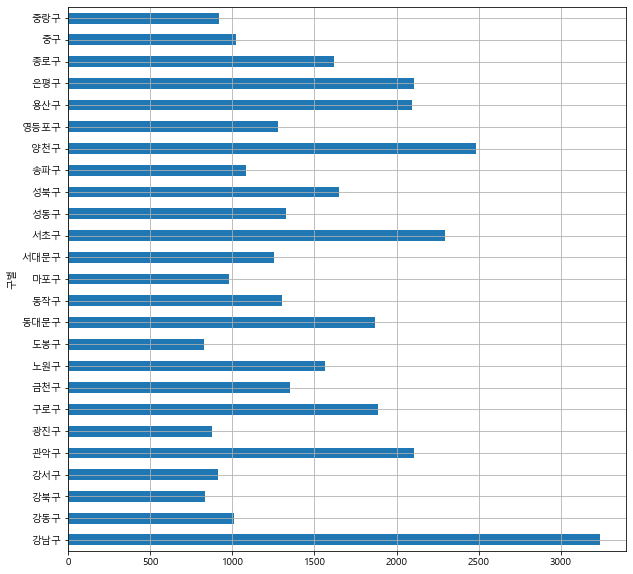

In [82]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))

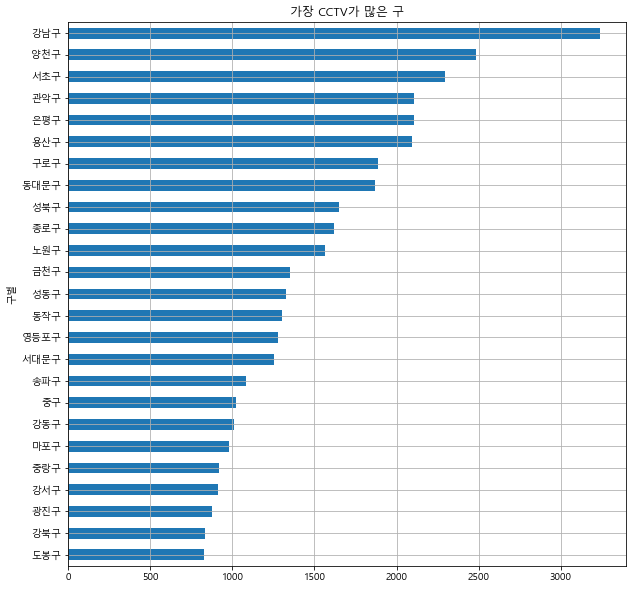

In [86]:
#### 정렬 후 그래프
def drawGraph():
    data_result['소계'].sort_values().plot(kind='barh', grid=True, title='가장 CCTV가 많은 구', figsize=(10, 10))

drawGraph()

In [87]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


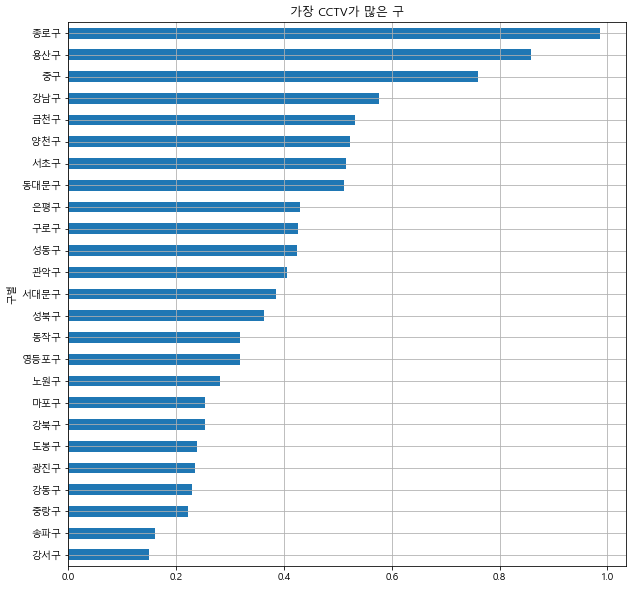

In [89]:
def drawGraph():
    data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, title='가장 CCTV가 많은 구', figsize=(10, 10))

drawGraph()

### 데이터 경향 표시

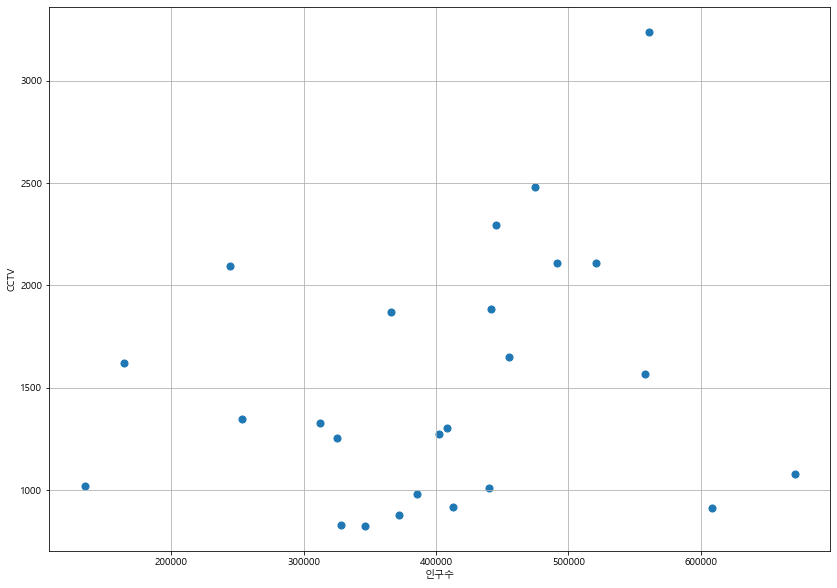

In [90]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

drawGraph()

#### 1차 방정식으로 트렌드 구하기

In [91]:
import numpy as np
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [92]:
f1 = np.poly1d(fp1)

In [93]:
f1(400000)

1509.7809252413333

In [94]:
### 경향선을 그리기 위해 X 데이터 생성
fx = np.linspace(100000, 700000, 100)

In [95]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

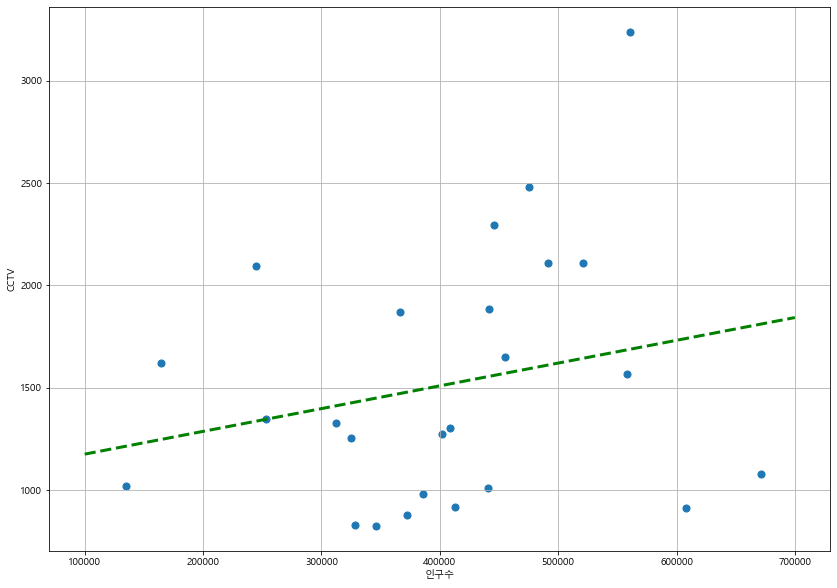

In [96]:
drawGraph()